# Fine tuning classification: policy claims (IV) using davinci

We will fine-tune an davinci classifier to train six classifiers for each level 2 policy claim 4.1 to 4.6

In [3]:
import pandas as pd
import numpy as np
import re

import openai
import os

from sklearn.metrics import classification_report

# Set openai API key
openai.api_key = os.getenv("OPENAI_API_KEY")

In [4]:
val = pd.read_json('../Classifiers/Data/cat_hearings_03_10_val.json')
test = pd.read_json('../Classifiers/Data/cat_hearings_03_10_test.json')

## Fine-tuning

### 4.1 Climate policies are harmful

In [ ]:
!openai api fine_tunes.create \
    -t ../Classifiers/Data/train_4_1_prepared.jsonl \
        -v ../Classifiers/Data/val_4_1_prepared.jsonl \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci --suffix "L2Pcat3-e3" --n_epochs 3

In [8]:
# Train classifier for three epochs
!openai api fine_tunes.create \
    -t file-mGD0et0aiiqDCtLEiY0AA2aN \
        -v file-68itQ5VrFt3iHyEBYnc07edF \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci --suffix "L2Pcat3-e3" --n_epochs 3

Created fine-tune: ft-Oox7yboe9YS2aaDWok6EjquB
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-03 10:12:30] Created fine-tune: ft-Oox7yboe9YS2aaDWok6EjquB

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-Oox7yboe9YS2aaDWok6EjquB



In [32]:
!  openai api fine_tunes.follow -i ft-Oox7yboe9YS2aaDWok6EjquB

[2023-06-03 10:12:30] Created fine-tune: ft-Oox7yboe9YS2aaDWok6EjquB
[2023-06-03 10:14:39] Fine-tune costs $9.18
[2023-06-03 10:14:39] Fine-tune enqueued. Queue number: 0
[2023-06-03 10:14:41] Fine-tune started
[2023-06-03 10:26:53] Completed epoch 1/3
[2023-06-03 10:47:09] Completed epoch 3/3
[2023-06-03 10:48:10] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-e3-2023-06-03-09-48-10
[2023-06-03 10:48:12] Uploaded result file: file-OC5JlaIXxT8rLH0qgiwL8ulX
[2023-06-03 10:48:12] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-e3-2023-06-03-09-48-10 -p <YOUR_PROMPT>


In [47]:
# Add one more epoch
!openai api fine_tunes.create \
    -t file-mGD0et0aiiqDCtLEiY0AA2aN \
        -v file-68itQ5VrFt3iHyEBYnc07edF \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci:ft-university-of-exeter:l2pcat3-e3-2023-06-03-09-48-10 --suffix "L2Pcat3-e4" --n_epochs=1

Created fine-tune: ft-FuRrol8pulk9GLgSqZqHivn2
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-05 11:36:02] Created fine-tune: ft-FuRrol8pulk9GLgSqZqHivn2

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-FuRrol8pulk9GLgSqZqHivn2



In [48]:
! openai api fine_tunes.follow -i ft-FuRrol8pulk9GLgSqZqHivn2


[2023-06-05 11:36:02] Created fine-tune: ft-FuRrol8pulk9GLgSqZqHivn2
[2023-06-05 11:37:53] Fine-tune costs $3.06
[2023-06-05 11:37:54] Fine-tune enqueued. Queue number: 1
[2023-06-05 11:38:43] Fine-tune is in the queue. Queue number: 0
[2023-06-05 11:39:27] Fine-tune started
[2023-06-05 11:52:26] Completed epoch 1/1
[2023-06-05 11:53:35] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-e4-2023-06-05-10-53-34
[2023-06-05 11:53:36] Uploaded result file: file-bLBLcw59YdDkimhwNaq6dMPm
[2023-06-05 11:53:36] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-e4-2023-06-05-10-53-34 -p <YOUR_PROMPT>


In [ ]:
# # Add one more epoch
# !openai api fine_tunes.create \
#     -t file-mGD0et0aiiqDCtLEiY0AA2aN \
#         -v file-68itQ5VrFt3iHyEBYnc07edF \
#             --compute_classification_metrics --classification_positive_class " 1.0" \
#                 -m ada:ft-university-of-exeter-2023-06-01-14-30-56 --suffix "L2Pcat3-e5" --n_epochs=1

In [ ]:
# Models

# epoch 1-3
# ft-Oox7yboe9YS2aaDWok6EjquB
# epoch 4
# ft-FuRrol8pulk9GLgSqZqHivn2
# epoch 5

### 4.2 Climate policies are ineffective / flawed

In [49]:
!openai api fine_tunes.create \
    -t ../Classifiers/Data/train_4_2_prepared.jsonl \
        -v ../Classifiers/Data/val_4_2_prepared.jsonl \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci --suffix "L2Pcat3_2-e3" --n_epochs 3

Found potentially duplicated files with name 'train_4_2_prepared.jsonl', purpose 'fine-tune' and size 520588 bytes
file-clv1WFfd84RgFd9KB5RDmrBS
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: ^C



In [51]:
# Train classifier for three epochs
!openai api fine_tunes.create \
    -t file-clv1WFfd84RgFd9KB5RDmrBS \
        -v  file-2XD8LIpZMnYVddGMkBGuzZCb \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci --suffix "L2Pcat3_2-e3" --n_epochs 3

Created fine-tune: ft-uXoZ9vO3MtMple5ZIIEPGUHd
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-05 12:22:05] Created fine-tune: ft-uXoZ9vO3MtMple5ZIIEPGUHd

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-uXoZ9vO3MtMple5ZIIEPGUHd



In [62]:
! openai api fine_tunes.follow -i ft-uXoZ9vO3MtMple5ZIIEPGUHd

[2023-06-05 12:22:05] Created fine-tune: ft-uXoZ9vO3MtMple5ZIIEPGUHd
[2023-06-05 12:23:54] Fine-tune costs $9.18
[2023-06-05 12:23:54] Fine-tune enqueued. Queue number: 0
[2023-06-05 12:44:01] Fine-tune started
[2023-06-05 12:56:36] Completed epoch 1/3
[2023-06-05 13:16:47] Completed epoch 3/3
[2023-06-05 13:17:50] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-2-e3-2023-06-05-12-17-50
[2023-06-05 13:17:52] Uploaded result file: file-9pM1WmT5RxTws2RzExzgnZsn
[2023-06-05 13:17:52] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-2-e3-2023-06-05-12-17-50 -p <YOUR_PROMPT>


In [66]:
# Add one more epoch
!openai api fine_tunes.create \
    -t file-clv1WFfd84RgFd9KB5RDmrBS \
        -v  file-2XD8LIpZMnYVddGMkBGuzZCb \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci:ft-university-of-exeter:l2pcat3-2-e3-2023-06-05-12-17-50 --suffix "L2Pcat3_2-e4" --n_epochs=1

Created fine-tune: ft-WagWHlPaWwCVzliZwMn2edA6
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-05 13:47:32] Created fine-tune: ft-WagWHlPaWwCVzliZwMn2edA6

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-WagWHlPaWwCVzliZwMn2edA6



In [72]:
! openai api fine_tunes.follow -i ft-WagWHlPaWwCVzliZwMn2edA6

[2023-06-05 13:47:32] Created fine-tune: ft-WagWHlPaWwCVzliZwMn2edA6
[2023-06-05 13:49:06] Fine-tune costs $3.06
[2023-06-05 13:49:07] Fine-tune enqueued. Queue number: 0
[2023-06-05 13:52:12] Fine-tune started
[2023-06-05 14:04:19] Completed epoch 1/1
[2023-06-05 14:05:28] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-2-e4-2023-06-05-13-05-28
[2023-06-05 14:05:29] Uploaded result file: file-H3Kj1xiweoOz1fkP9jc0WRUi
[2023-06-05 14:05:29] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-2-e4-2023-06-05-13-05-28 -p <YOUR_PROMPT>


In [ ]:
# # Add one more epoch
# !openai api fine_tunes.create \


#             --compute_classification_metrics --classification_positive_class " 1.0" \
#                 -m ada:ft-university-of-exeter-2023-06-01-14-30-56 --suffix "L2Pcat3_2-e5" --n_epochs=1

In [ ]:
# Models

# epoch 1-3
ft-uXoZ9vO3MtMple5ZIIEPGUHd
# epoch 4
ft-WagWHlPaWwCVzliZwMn2edA6
# epoch 5

### 4.3-4.6 Other reasons against policy 

In [20]:
# !openai api fine_tunes.create \
#     -t ../Classifiers/Data/train_4_3456_prepared.jsonl \
#         -v ../Classifiers/Data/val_4_3456_prepared.jsonl \
#             --compute_classification_metrics --classification_positive_class " 1.0" \
#                 -m davinci --suffix "L2Pcat3_3456-e3" --n_epochs 3

In [19]:
# Train classifier for three epochs
!openai api fine_tunes.create \
    -t file-4zNTzjAXb0zo3haRrxi18aJj \
        -v file-EPSjYjwUPScBSKC7iIjZKE1t \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci --suffix "L2Pcat3_3456-e3" --n_epochs 3

Created fine-tune: ft-odHGXVgPpdYxVRnHG1EgTKjq
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-03 10:36:59] Created fine-tune: ft-odHGXVgPpdYxVRnHG1EgTKjq

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-odHGXVgPpdYxVRnHG1EgTKjq



In [25]:
! openai api fine_tunes.follow -i ft-odHGXVgPpdYxVRnHG1EgTKjq

[2023-06-03 10:36:59] Created fine-tune: ft-odHGXVgPpdYxVRnHG1EgTKjq
[2023-06-03 10:48:14] Fine-tune costs $9.18
[2023-06-03 10:48:14] Fine-tune enqueued. Queue number: 0
[2023-06-03 10:48:16] Fine-tune started
[2023-06-03 11:01:01] Completed epoch 1/3
[2023-06-03 11:21:18] Completed epoch 3/3
[2023-06-03 11:22:25] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-3456-e3-2023-06-03-10-22-24
[2023-06-03 11:22:26] Uploaded result file: file-nCpGtu8K3P7N0rNDcJnPcbXU
[2023-06-03 11:22:27] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-3456-e3-2023-06-03-10-22-24 -p <YOUR_PROMPT>


In [36]:
# Add one more epoch
!openai api fine_tunes.create \
    -t file-4zNTzjAXb0zo3haRrxi18aJj \
        -v file-EPSjYjwUPScBSKC7iIjZKE1t \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci:ft-university-of-exeter:l2pcat3-3456-e3-2023-06-03-10-22-24 --suffix "L2Pcat3_3456-e4" --n_epochs=1

Created fine-tune: ft-yK4GWEwOx9FoK0fQ7ubZaiCW
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-03 11:29:36] Created fine-tune: ft-yK4GWEwOx9FoK0fQ7ubZaiCW

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-yK4GWEwOx9FoK0fQ7ubZaiCW



In [37]:
! openai api fine_tunes.follow -i ft-yK4GWEwOx9FoK0fQ7ubZaiCW

[2023-06-03 11:29:36] Created fine-tune: ft-yK4GWEwOx9FoK0fQ7ubZaiCW
[2023-06-03 11:31:06] Fine-tune costs $3.06
[2023-06-03 11:31:06] Fine-tune enqueued. Queue number: 0
[2023-06-03 11:31:08] Fine-tune started
[2023-06-03 11:43:37] Completed epoch 1/1
[2023-06-03 11:44:45] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-3456-e4-2023-06-03-10-44-44
[2023-06-03 11:44:46] Uploaded result file: file-7NiNrqIhU2YWqa81bVjNIWZU
[2023-06-03 11:44:46] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-3456-e4-2023-06-03-10-44-44 -p <YOUR_PROMPT>


In [41]:
# Add one more epoch
!openai api fine_tunes.create \
    -t file-4zNTzjAXb0zo3haRrxi18aJj \
        -v file-EPSjYjwUPScBSKC7iIjZKE1t \
            --compute_classification_metrics --classification_positive_class " 1.0" \
                -m davinci:ft-university-of-exeter:l2pcat3-3456-e4-2023-06-03-10-44-44 --suffix "L2Pcat3_3456-e5" --n_epochs=1

Created fine-tune: ft-JtwazKbn6e5Ax7HMTLGaKpFt
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-03 12:15:11] Created fine-tune: ft-JtwazKbn6e5Ax7HMTLGaKpFt

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-JtwazKbn6e5Ax7HMTLGaKpFt



In [43]:
! openai api fine_tunes.follow -i ft-JtwazKbn6e5Ax7HMTLGaKpFt

[2023-06-03 12:15:11] Created fine-tune: ft-JtwazKbn6e5Ax7HMTLGaKpFt
[2023-06-03 12:17:27] Fine-tune costs $3.06
[2023-06-03 12:17:27] Fine-tune enqueued. Queue number: 0
[2023-06-03 12:17:29] Fine-tune started
[2023-06-03 12:29:50] Completed epoch 1/1
[2023-06-03 12:30:56] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-3456-e5-2023-06-03-11-30-56
[2023-06-03 12:30:57] Uploaded result file: file-JsnKecwyn5TPE0NDi8IQ6MdQ
[2023-06-03 12:30:58] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-3456-e5-2023-06-03-11-30-56 -p <YOUR_PROMPT>


In [ ]:
# Models

# epoch 1-3
# ft-odHGXVgPpdYxVRnHG1EgTKjq
# epoch 4
# ft-yK4GWEwOx9FoK0fQ7ubZaiCW
# epoch 5
# ft-JtwazKbn6e5Ax7HMTLGaKpFt

## Results

### 4.1 Climate policies are harmful

In [55]:
!openai api fine_tunes.follow -i ft-Oox7yboe9YS2aaDWok6EjquB
!openai api fine_tunes.results -i ft-Oox7yboe9YS2aaDWok6EjquB > ../Classifiers/Results/result_4_1_davinci_1.csv

[2023-06-03 10:12:30] Created fine-tune: ft-Oox7yboe9YS2aaDWok6EjquB
[2023-06-03 10:14:39] Fine-tune costs $9.18
[2023-06-03 10:14:39] Fine-tune enqueued. Queue number: 0
[2023-06-03 10:14:41] Fine-tune started
[2023-06-03 10:26:53] Completed epoch 1/3
[2023-06-03 10:47:09] Completed epoch 3/3
[2023-06-03 10:48:10] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-e3-2023-06-03-09-48-10
[2023-06-03 10:48:12] Uploaded result file: file-OC5JlaIXxT8rLH0qgiwL8ulX
[2023-06-03 10:48:12] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-e3-2023-06-03-09-48-10 -p <YOUR_PROMPT>


In [56]:
results_4_1 = pd.read_csv('../Classifiers/Results/result_4_1_davinci_1.csv')
results_4_1.insert(9, 'claim', '4_1' )
results_4_1.insert(9, 'LLM', 'davinci')
results_4_1[results_4_1['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
1773,davinci,4_1,0.905138,0.78125,0.833333,0.951727,0.879309,0.806452


In [57]:
!openai api fine_tunes.follow -i ft-FuRrol8pulk9GLgSqZqHivn2
!openai api fine_tunes.results -i ft-FuRrol8pulk9GLgSqZqHivn2 > ../Classifiers/Results/result_4_1_davinci_1_epoch4.csv

[2023-06-05 11:36:02] Created fine-tune: ft-FuRrol8pulk9GLgSqZqHivn2
[2023-06-05 11:37:53] Fine-tune costs $3.06
[2023-06-05 11:37:54] Fine-tune enqueued. Queue number: 1
[2023-06-05 11:38:43] Fine-tune is in the queue. Queue number: 0
[2023-06-05 11:39:27] Fine-tune started
[2023-06-05 11:52:26] Completed epoch 1/1
[2023-06-05 11:53:35] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-e4-2023-06-05-10-53-34
[2023-06-05 11:53:36] Uploaded result file: file-bLBLcw59YdDkimhwNaq6dMPm
[2023-06-05 11:53:36] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-e4-2023-06-05-10-53-34 -p <YOUR_PROMPT>


In [58]:
results_4_1_epoch4 = pd.read_csv('../Classifiers/Results/result_4_1_davinci_1_epoch4.csv')
results_4_1_epoch4.insert(9, 'claim', '4_1' )
results_4_1_epoch4.insert(9, 'LLM', 'davinci')
results_4_1_epoch4.step = results_4_1_epoch4.step + max(results_4_1.step)
results_4_1 = results_4_1.append(results_4_1_epoch4).reset_index(drop=True)
results_4_1[results_4_1['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

/var/folders/np/jbf6hhl91dl0nv07jvzslzl00000gn/T/ipykernel_66243/3034398601.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_4_1 = results_4_1.append(results_4_1_epoch4).reset_index(drop=True)


,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2365,davinci,4_1,0.897233,0.774194,0.8,0.947453,0.853717,0.786885


<AxesSubplot: >

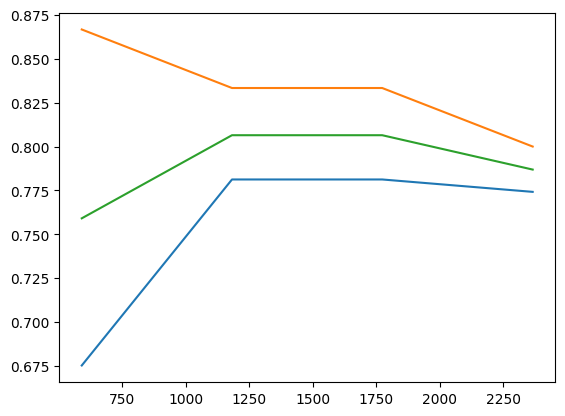

In [59]:
results_4_1[results_4_1['classification/precision'].notnull()]['classification/precision'].plot()
results_4_1[results_4_1['classification/recall'].notnull()]['classification/recall'].plot()
results_4_1[results_4_1['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [ ]:
# >>> Best model: davinci:ft-university-of-exeter:l2pcat3-e3-2023-06-03-09-48-10 (3 epochs)

In [77]:
ft_model_4_1 = 'davinci:ft-university-of-exeter:l2pcat3-e3-2023-06-03-09-48-10'

predicted_probabilities_4_1 = []
predicted_label_4_1 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_1, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_1.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_1.append(result['choices'][0]['text'])

predictions_4_1 = pd.DataFrame(zip(predicted_probabilities_4_1, predicted_label_4_1), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_1

,predicted_probabilities,predicted_label
0,"{' 1': -6.9740973, ' 0': -0.00094137463}",0
1,"{'0': -10.2131815, ' 0': -5.037998e-05}",0
2,"{' 1': -11.6817465, ' 0': -1.5448071e-05}",0
3,"{' 1': -11.0698185, ' 0': -5.1930627e-05}",0
4,"{' 1': -6.279108, ' 0': -0.0018981381}",0
...,...,...
248,"{'0': -10.729309, ' 0': -4.2631407e-05}",0
249,"{' 1': -0.8343851, ' 0': -0.56965667}",0
250,"{'0': -10.934892, ' 0': -2.4272329e-05}",0
251,"{' 1': -1.6810936, ' 0': -0.20618276}",0


### 4.2 Climate policies are ineffective / flawed

In [63]:
!openai api fine_tunes.follow -i ft-uXoZ9vO3MtMple5ZIIEPGUHd
!openai api fine_tunes.results -i ft-uXoZ9vO3MtMple5ZIIEPGUHd > ../Classifiers/Results/result_4_2_davinci_1.csv

[2023-06-05 12:22:05] Created fine-tune: ft-uXoZ9vO3MtMple5ZIIEPGUHd
[2023-06-05 12:23:54] Fine-tune costs $9.18
[2023-06-05 12:23:54] Fine-tune enqueued. Queue number: 0
[2023-06-05 12:44:01] Fine-tune started
[2023-06-05 12:56:36] Completed epoch 1/3
[2023-06-05 13:16:47] Completed epoch 3/3
[2023-06-05 13:17:50] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-2-e3-2023-06-05-12-17-50
[2023-06-05 13:17:52] Uploaded result file: file-9pM1WmT5RxTws2RzExzgnZsn
[2023-06-05 13:17:52] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-2-e3-2023-06-05-12-17-50 -p <YOUR_PROMPT>


In [64]:
results_4_2 = pd.read_csv('../Classifiers/Results/result_4_2_davinci_1.csv')
results_4_2.insert(9, 'claim', '4_2' )
results_4_2.insert(9, 'LLM', 'davinci')
results_4_2[results_4_2['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
1772,davinci,4_2,0.952569,0.777778,0.777778,0.930842,0.747945,0.777778


In [73]:
!openai api fine_tunes.follow -i ft-WagWHlPaWwCVzliZwMn2edA6
!openai api fine_tunes.results -i ft-WagWHlPaWwCVzliZwMn2edA6 > ../Classifiers/Results/result_4_2_davinci_1_epoch4.csv

[2023-06-05 13:47:32] Created fine-tune: ft-WagWHlPaWwCVzliZwMn2edA6
[2023-06-05 13:49:06] Fine-tune costs $3.06
[2023-06-05 13:49:07] Fine-tune enqueued. Queue number: 0
[2023-06-05 13:52:12] Fine-tune started
[2023-06-05 14:04:19] Completed epoch 1/1
[2023-06-05 14:05:28] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-2-e4-2023-06-05-13-05-28
[2023-06-05 14:05:29] Uploaded result file: file-H3Kj1xiweoOz1fkP9jc0WRUi
[2023-06-05 14:05:29] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-2-e4-2023-06-05-13-05-28 -p <YOUR_PROMPT>


In [75]:
results_4_2_epoch4 = pd.read_csv('../Classifiers/Results/result_4_2_davinci_1_epoch4.csv')
results_4_2_epoch4.insert(9, 'claim', '4_3456' )
results_4_2_epoch4.insert(9, 'LLM', 'davinci')
results_4_2_epoch4.step = results_4_2_epoch4.step + max(results_4_2.step)
results_4_2 = results_4_2.append(results_4_2_epoch4).reset_index(drop=True)
results_4_2[results_4_2['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

/var/folders/np/jbf6hhl91dl0nv07jvzslzl00000gn/T/ipykernel_66243/3219098953.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_4_2 = results_4_2.append(results_4_2_epoch4).reset_index(drop=True)


,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2364,davinci,4_3456,0.940711,0.714286,0.740741,0.934612,0.710402,0.727273


<AxesSubplot: >

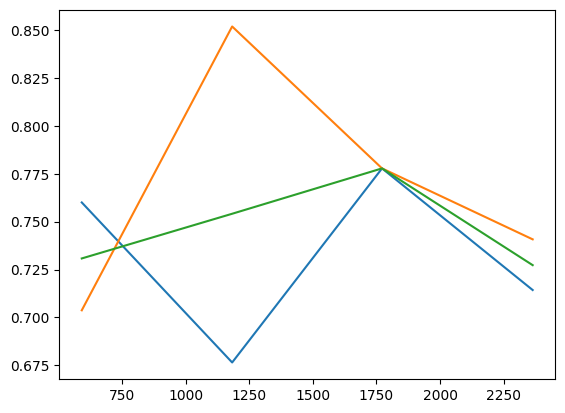

In [76]:
results_4_2[results_4_2['classification/precision'].notnull()]['classification/precision'].plot()
results_4_2[results_4_2['classification/recall'].notnull()]['classification/recall'].plot()
results_4_2[results_4_2['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [ ]:
# >>> Best model: davinci:ft-university-of-exeter:l2pcat3-2-e3-2023-06-05-12-17-50 (3 epochs)

In [78]:
ft_model_4_2 = 'davinci:ft-university-of-exeter:l2pcat3-2-e3-2023-06-05-12-17-50'

predicted_probabilities_4_2 = []
predicted_label_4_2 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_2, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_2.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_2.append(result['choices'][0]['text'])

predictions_4_2 = pd.DataFrame(zip(predicted_probabilities_4_2, predicted_label_4_2), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_2

,predicted_probabilities,predicted_label
0,"{'0': -11.036954, ' 0': -1.676031e-05}",0
1,"{'0': -9.337851, ' 0': -9.0318645e-05}",0
2,"{'0': -9.8015995, ' 0': -5.5385808e-05}",0
3,"{'0': -8.05194, ' 0': -0.000319663}",0
4,"{' 1': -0.46537226, ' 0': -0.9887983}",1
...,...,...
248,"{'0': -8.306153, ' 0': -0.00026087437}",0
249,"{' 1': -2.0358036, ' 0': -0.13996017}",0
250,"{'0': -8.49618, ' 0': -0.0002121687}",0
251,"{' 1': -9.118754, ' 0': -0.00012930272}",0


### 4.3-4.6 Other reasons against policy 

In [29]:
!openai api fine_tunes.follow -i ft-odHGXVgPpdYxVRnHG1EgTKjq
!openai api fine_tunes.results -i ft-odHGXVgPpdYxVRnHG1EgTKjq > ../Classifiers/Results/result_4_3456_davinci_1.csv

[2023-06-03 10:36:59] Created fine-tune: ft-odHGXVgPpdYxVRnHG1EgTKjq
[2023-06-03 10:48:14] Fine-tune costs $9.18
[2023-06-03 10:48:14] Fine-tune enqueued. Queue number: 0
[2023-06-03 10:48:16] Fine-tune started
[2023-06-03 11:01:01] Completed epoch 1/3
[2023-06-03 11:21:18] Completed epoch 3/3
[2023-06-03 11:22:25] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-3456-e3-2023-06-03-10-22-24
[2023-06-03 11:22:26] Uploaded result file: file-nCpGtu8K3P7N0rNDcJnPcbXU
[2023-06-03 11:22:27] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-3456-e3-2023-06-03-10-22-24 -p <YOUR_PROMPT>


In [30]:
results_4_3456 = pd.read_csv('../Classifiers/Results/result_4_3456_davinci_1.csv')
results_4_3456.insert(9, 'claim', '4_3456' )
results_4_3456.insert(9, 'LLM', 'davinci')
results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
1773,davinci,4_3456,0.865613,0.53125,0.472222,0.871096,0.524044,0.5


In [38]:
!openai api fine_tunes.follow -i ft-yK4GWEwOx9FoK0fQ7ubZaiCW
!openai api fine_tunes.results -i ft-yK4GWEwOx9FoK0fQ7ubZaiCW > ../Classifiers/Results/result_4_3456_davinci_1_epoch4.csv

[2023-06-03 11:29:36] Created fine-tune: ft-yK4GWEwOx9FoK0fQ7ubZaiCW
[2023-06-03 11:31:06] Fine-tune costs $3.06
[2023-06-03 11:31:06] Fine-tune enqueued. Queue number: 0
[2023-06-03 11:31:08] Fine-tune started
[2023-06-03 11:43:37] Completed epoch 1/1
[2023-06-03 11:44:45] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-3456-e4-2023-06-03-10-44-44
[2023-06-03 11:44:46] Uploaded result file: file-7NiNrqIhU2YWqa81bVjNIWZU
[2023-06-03 11:44:46] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-3456-e4-2023-06-03-10-44-44 -p <YOUR_PROMPT>


In [39]:
results_4_3456_epoch4 = pd.read_csv('../Classifiers/Results/result_4_3456_davinci_1_epoch4.csv')
results_4_3456_epoch4.insert(9, 'claim', '4_3456' )
results_4_3456_epoch4.insert(9, 'LLM', 'davinci')
results_4_3456_epoch4.step = results_4_3456_epoch4.step + max(results_4_3456.step)
results_4_3456 = results_4_3456.append(results_4_3456_epoch4).reset_index(drop=True)
results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

/var/folders/np/jbf6hhl91dl0nv07jvzslzl00000gn/T/ipykernel_66243/3548520175.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_4_3456 = results_4_3456.append(results_4_3456_epoch4).reset_index(drop=True)


,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2365,davinci,4_3456,0.889328,0.633333,0.527778,0.878648,0.580337,0.575758


In [44]:
! openai api fine_tunes.follow -i ft-JtwazKbn6e5Ax7HMTLGaKpFt
! openai api fine_tunes.results -i ft-JtwazKbn6e5Ax7HMTLGaKpFt > ../Classifiers/Results/result_4_3456_davinci_1_epoch5.csv

[2023-06-03 12:15:11] Created fine-tune: ft-JtwazKbn6e5Ax7HMTLGaKpFt
[2023-06-03 12:17:27] Fine-tune costs $3.06
[2023-06-03 12:17:27] Fine-tune enqueued. Queue number: 0
[2023-06-03 12:17:29] Fine-tune started
[2023-06-03 12:29:50] Completed epoch 1/1
[2023-06-03 12:30:56] Uploaded model: davinci:ft-university-of-exeter:l2pcat3-3456-e5-2023-06-03-11-30-56
[2023-06-03 12:30:57] Uploaded result file: file-JsnKecwyn5TPE0NDi8IQ6MdQ
[2023-06-03 12:30:58] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-university-of-exeter:l2pcat3-3456-e5-2023-06-03-11-30-56 -p <YOUR_PROMPT>


In [45]:
results_4_3456_epoch5 = pd.read_csv('../Classifiers/Results/result_4_3456_davinci_1_epoch5.csv')
results_4_3456_epoch5.insert(9, 'claim', '4_3456' )
results_4_3456_epoch5.insert(9, 'LLM', 'davinci')
results_4_3456_epoch5.step = results_4_3456_epoch5.step + max(results_4_3456.step)
results_4_3456 = results_4_3456.append(results_4_3456_epoch5).reset_index(drop=True)
results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

/var/folders/np/jbf6hhl91dl0nv07jvzslzl00000gn/T/ipykernel_66243/2471579726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_4_3456 = results_4_3456.append(results_4_3456_epoch5).reset_index(drop=True)


,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2957,davinci,4_3456,0.857708,0.5,0.444444,0.887225,0.557334,0.470588


<AxesSubplot: >

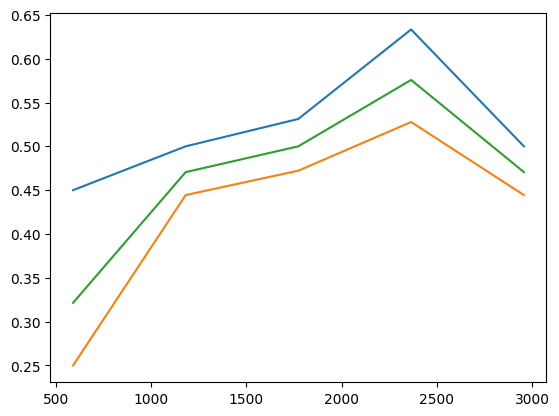

In [46]:
results_4_3456[results_4_3456['classification/precision'].notnull()]['classification/precision'].plot()
results_4_3456[results_4_3456['classification/recall'].notnull()]['classification/recall'].plot()
results_4_3456[results_4_3456['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [60]:
# >>> Best model: davinci:ft-university-of-exeter:l2pcat3-3456-e4-2023-06-03-10-44-44 (4 epochs)

In [79]:
ft_model_4_3 = 'davinci:ft-university-of-exeter:l2pcat3-3456-e4-2023-06-03-10-44-44'

predicted_probabilities_4_3 = []
predicted_label_4_3 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_3, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_3.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_3.append(result['choices'][0]['text'])

predictions_4_3 = pd.DataFrame(zip(predicted_probabilities_4_3, predicted_label_4_3), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_3

,predicted_probabilities,predicted_label
0,"{' 1': -0.0002903283, ' 0': -8.189293}",1
1,"{'0': -11.528332, ' 0': -1.771398e-05}",0
2,"{'0': -14.272926, ' 0': -1.022884e-06}",0
3,"{' 1': -0.0004975345, ' 0': -7.656167}",1
4,"{'0': -13.970338, ' 0': -1.8601542e-06}",0
...,...,...
248,"{'0': -13.045104, ' 0': -2.693682e-06}",0
249,"{' 1': -12.367308, ' 0': -5.79217e-06}",0
250,"{'0': -12.72806, ' 0': -4.1232483e-06}",0
251,"{' 1': -0.14578271, ' 0': -1.9978602}",1


## Summary

In [81]:
pd.concat([results_4_1[results_4_1['classification/accuracy'].notnull()].iloc[:,9:17].tail(1),
           results_4_2[results_4_2['classification/accuracy'].notnull()].iloc[:,9:17].tail(1),
           results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)]).reset_index(drop=True)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
0,davinci,4_1,0.897233,0.774194,0.800000,0.947453,0.853717,0.786885
1,davinci,4_3456,0.940711,0.714286,0.740741,0.934612,0.710402,0.727273
2,davinci,4_3456,0.857708,0.500000,0.444444,0.887225,0.557334,0.470588


In [82]:
# Multi-hot encode the labels
val['predicted_labels_davinci'] = pd.concat([predictions_4_1.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int),
                                             predictions_4_2.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int),
                                             predictions_4_3.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)], axis=1).values.tolist()

In [83]:
# davinci model results on validation data

# Print the classification report
print("Classification performance\n-------------------")
print(classification_report(val['labels'].values.tolist(), val['predicted_labels_davinci'].values.tolist()))

# Check overall performance
# Print the classification report
print("Overall performance\n-------------------")
print(classification_report([1 if sum(i)>0 else 0 for i in val['labels']], [1 if sum(i)>0 else 0 for i in val['predicted_labels_davinci']]))

Classification performance
-------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        60
           1       0.78      0.78      0.78        27
           2       0.61      0.53      0.57        36

   micro avg       0.74      0.73      0.73       123
   macro avg       0.72      0.71      0.72       123
weighted avg       0.73      0.73      0.73       123
 samples avg       0.29      0.29      0.28       123

Overall performance
-------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       153
           1       0.84      0.81      0.82       100

    accuracy                           0.86       253
   macro avg       0.86      0.85      0.85       253
weighted avg       0.86      0.86      0.86       253



/Users/mn/Library/CloudStorage/OneDrive-UniversityofExeter/Projects/GitHub/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mn/Library/CloudStorage/OneDrive-UniversityofExeter/Projects/GitHub/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
# Save the predictions

val.to_json("../Classifiers/Data/cat_hearings_03_10_val_davinci_labels.json")

In [85]:
val

,congress,chamber,committee,committee_short,year,date,title,hearing_id,type,last_name,...,L2policyclaims,L3policyclaims,L4policyclaims,L2policyclaims_multi_hot,labelled,L2dummy_4_45,L2dummy_4_3456,CLAIMS,labels,predicted_labels_davinci
1479,111,SENATE,Committee on Environment and Public Works,Environment and Public Works,2009,2009-10-29,"Legislative Hearing on S. 1733, Clean Energy J...",111shrg20183,witness,Cicio,...,[4.6],[4.6.2],[0.0],"[1, 0, 0, 0, 0, 0, 1, 0]",True,0,1,"[0.0, 0.0, 1.0]","[0, 0, 1]","[0, 0, 1]"
903,111,HOUSE,Committee on Energy and Commerce,Energy and Commerce,2009,2009-02-12,"The Climate Crisis: National Security, Public ...",111hhrg63825,witness,Michaels,...,[0.0],[0.0],[0.0],"[1, 0, 0, 0, 0, 0, 0, 0]",True,0,0,"[0.0, 0.0, 0.0]","[0, 0, 0]","[0, 0, 0]"
803,110,HOUSE,Committee on Energy and Commerce,Energy and Commerce,2008,2008-06-19,Legislative Proposals to Reduce Greenhouse Gas...,110hhrg56980,witness,Kuhn,...,[0.0],[0.0],[0.0],"[1, 0, 0, 0, 0, 0, 0, 0]",True,0,0,"[0.0, 0.0, 0.0]","[0, 0, 0]","[0, 0, 0]"
664,110,HOUSE,Select Committee on Energy Independence and Gl...,Energy Independence and Global Warming,2007,2007-04-26,Dangerous Climate Change,110hhrg57965,witness,Curry,...,[0.0],[0.0],[0.0],"[1, 0, 0, 0, 0, 0, 0, 0]",True,0,0,"[0.0, 0.0, 0.0]","[0, 0, 0]","[0, 0, 1]"
1453,111,SENATE,Committee on Environment and Public Works,Environment and Public Works,2009,2009-10-29,"Legislative Hearing on S. 1733, Clean Energy J...",111shrg20183,witness,Murray,...,[4.2],[4.2.5],[0.0],"[1, 0, 1, 0, 0, 0, 0, 0]",True,0,0,"[0.0, 1.0, 0.0]","[0, 1, 0]","[0, 1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,111,HOUSE,Committee on Science and Technology,Science and Technology,2010,2010-11-17,A Rational Discussion of Climate Change: The S...,111hhrg62618,witness,Lindzen,...,[0.0],[0.0],[0.0],"[1, 0, 0, 0, 0, 0, 0, 0]",True,0,0,"[0.0, 0.0, 0.0]","[0, 0, 0]","[0, 0, 0]"
1474,111,SENATE,Committee on Environment and Public Works,Environment and Public Works,2009,2009-10-29,"Legislative Hearing on S. 1733, Clean Energy J...",111shrg20183,witness,Cicio,...,"[4.1, 4.2]","[4.1.1, 4.2.6]",[4.1.1.1],"[0, 1, 1, 0, 0, 0, 0, 0]",True,0,0,"[1.0, 1.0, 0.0]","[1, 1, 0]","[0, 0, 0]"
853,110,SENATE,Committee on Environment and Public Works,Environment and Public Works,2008,2008-07-22,An Update on the Science of Global Warming and...,110shrg88902,witness,Spencer,...,[0.0],[0.0],[0.0],"[1, 0, 0, 0, 0, 0, 0, 0]",True,0,0,"[0.0, 0.0, 0.0]","[0, 0, 0]","[0, 0, 0]"
1682,111,HOUSE,Committee on Science and Technology,Science and Technology,2010,2010-11-17,A Rational Discussion of Climate Change: The S...,111hhrg62618,witness,Curry,...,[0.0],[0.0],[0.0],"[1, 0, 0, 0, 0, 0, 0, 0]",True,0,0,"[0.0, 0.0, 0.0]","[0, 0, 0]","[0, 0, 1]"
